In [5]:
options(warn = -1)
options(scipen = 100)
library(nnet)
library(party)
library(randomForest)
library(e1071)
library(caret)
library(dplyr)
library(Metrics)

In [40]:
paste(1,"1")

[1] "1 1"

In [93]:
print(a()[1])

[1] 1


In [66]:
class((1,2))

[1] "numeric"

In [103]:
# 정확도 (결정계수)
rsquare <- function(pred, y) {
    return (1- (sum((y-pred)^2) / sum((y-mean(y))^2)))
}
# 평균 절대 오차 



# 인공 신경망
f.nnet <- function(data.tr, x, y) {
    model.nnet <- nnet(누적관객수 ~ ., data=data.tr, size = 10, linout = T) 
    pred <- predict(model.nnet, x, type = "raw")
    x <- c((rsquare(pred,y)),mae(y,pred))
    return (x)
}

# 의사 결정 나무
f.ctree <- function(data.tr, x, y) {
    model.ctree <- ctree(누적관객수 ~ ., data=data.tr)
    pred <- predict(model.ctree, x)
    x <- c((rsquare(pred,y)),mae(y,pred))
    return (x)
    
}

# RandomForest
f.randomForest <- function(data.tr, x, y) {
    model.rf <- randomForest(누적관객수 ~ ., data=data.tr, ntree=100)
    pred <- predict(model.rf, x)
    x <- c((rsquare(pred,y)),mae(y,pred))
    return (x)
}


# SVM
f.svm <- function(data.tr, x, y) {
    model.svm <- svm(누적관객수 ~., data=data.tr)
    pred <- predict(model.svm, x)
    x <- c((rsquare(pred,y)),mae(y,pred))
    return (x)
}

# 다항 로지스틱 회귀분석
f.multinom <- function(data.tr, x, y) {
    model.multinom <- multinom(누적관객수 ~ ., data=data.tr)
    pred <- predict(model.multinom, x)
    x <- c((rsquare(pred,y)),mae(y,pred))
    return (x)
}


In [151]:
data <- read.csv("../movies2/MLData.csv", fileEncoding = "utf-8")

In [152]:
rice <- read.csv("../movies2/rice.csv", fileEncoding = "utf-8")

In [153]:
df <- read.csv("../movies2/First_Price.csv")

In [138]:
rice <- rice[,-1]

In [139]:
data <- cbind(rice, 누적관객수=data$누적관객수)

In [147]:
head(data)

감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,누적관객수
3,23.79760,3.000000,10,4.000000,4039891
8,48.26242,2.000000,10,8.250000,3678156
0,36.90476,2.333333,10,4.000000,3117859
3,35.27944,3.571429,10,6.777778,4313101
0,21.64329,3.500000,10,7.666667,3024666
6,28.49592,3.500000,20,6.500000,4111237


In [148]:
head(df)

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가,배급사점수
7급 공무원,26380710000,4039891,475,90779,2009-04-22,(주)롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,6.50000,4.000000,3.000000,10,9,TRUE,FALSE,FALSE,FALSE,2
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,14.75000,8.250000,2.000000,10,8,TRUE,FALSE,FALSE,FALSE,2
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,10.50000,4.000000,2.333333,10,8,FALSE,TRUE,FALSE,FALSE,1
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,CJ ENM,15세이상관람가,"드라마,액션",강우석,...,10.63492,6.777778,3.571429,10,9,FALSE,TRUE,FALSE,FALSE,3
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,17.66667,7.666667,3.500000,10,9,FALSE,TRUE,FALSE,FALSE,3
건축학개론,30223590400,4111237,593,106069,2012-03-22,(주)롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,16.75000,6.500000,3.500000,20,10,TRUE,FALSE,FALSE,FALSE,2


In [149]:
result <- rep(0,5)
result2 <- rep(0,5)
temp <- rep(0,5)
temp2 <- rep(0,5)
n <- 20
set.seed(1234)
samp <- createDataPartition(data$누적관객수, p = 0.7, list = F)
for (i in 1:n) {
set.seed(i)


    # 학습용 데이터 셋
    data.tr <- data[samp,]

    # 검증용 데이터셋
    data.test <- data[-samp,]

    # 문제 및 정답 만들기
    x <- subset(data.test, select = -누적관객수)
    y <- data.test$누적관객수
    result[1] <- result[1] + f.nnet(data.tr, x, y)[1]
    result[2] <- result[2] + f.ctree(data.tr, x, y)[1]
    result[3] <- result[3] + f.randomForest(data.tr, x, y)[1]
    result[4] <- result[4] + f.svm(data.tr, x, y)[1]
    result[5] <- result[5] + f.multinom(data.tr, x, y)[1]
    
    #result2는 
    result2[1] <- result2[1] + f.nnet(data.tr, x, y)[2]
    result2[2] <- result2[2] + f.ctree(data.tr, x, y)[2]
    result2[3] <- result2[3] + f.randomForest(data.tr, x, y)[2]
    result2[4] <- result2[4] + f.svm(data.tr, x, y)[2]
    result2[5] <- result2[5] + f.multinom(data.tr, x, y)[2]
    
    temp[1] <- temp[1] + f.nnet(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[1]
    temp[2] <- temp[2] + f.ctree(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[1]
    temp[3] <- temp[3] + f.randomForest(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[1]
    temp[4] <- temp[4] + f.svm(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[1]
    temp[5] <- temp[5] + f.multinom(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[1]
    
    temp2[1] <- temp2[1] + f.nnet(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[2]
    temp2[2] <- temp2[2] + f.ctree(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[2]
    temp2[3] <- temp2[3] + f.randomForest(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[2]
    temp2[4] <- temp2[4] + f.svm(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[2]
    temp2[5] <- temp2[5] + f.multinom(data.tr, subset(data.tr, select = -누적관객수), data.tr$누적관객수)[2]
    
    
    
    
}
result <- result / n
result2 <- result2 / n
temp <- temp / n
temp2 <- temp2 / n

# weights:  71
initial  value 2305979568159623.000000 
iter  10 value 195347956932461.343750
iter  20 value 176820136564645.375000
iter  30 value 101307731180658.015625
iter  40 value 100406624267333.062500
final  value 100406233379294.187500 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305981144738028.000000 
final  value 227881965946133.843750 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32

initial  value 2305979317427970.000000 
final  value 227881965946133.875000 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305978802301288.000000 
final  value 227881965946134.000000 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979390944581.000000 
final  value 227881965946133

initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979659476776.000000 
final  value 227881965946133.875000 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979961750739.000000 
final  value 227881965946133.875000 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 

initial  value 2305980811696988.000000 
final  value 227881965946133.906250 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979848252617.500000 
final  value 227881965946133.812500 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979526401774.500000 
final  value 227881965946133

initial  value 2305979930312201.000000 
final  value 227881965946133.906250 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305980545779370.500000 
final  value 227881965946133.843750 
converged
# weights:  532 (450 variable)
initial  value 329.135734 
iter  10 value 211.353143
iter  20 value 166.021922
iter  30 value 147.997327
iter  40 value 129.223543
iter  50 value 107.196513
iter  60 value 82.912087
iter  70 value 60.060125
iter  80 value 46.623884
iter  90 value 32.130578
iter 100 value 2.341103
final  value 2.341103 
stopped after 100 iterations
# weights:  71
initial  value 2305979384174947.500000 
final  value 227881965946135

In [150]:
res_all <- rbind(t(as.data.frame(temp)),t(as.data.frame(temp2)),t(as.data.frame(result)),t(as.data.frame(result2)))
colnames(res_all) <- c("인공신경망", "의사결정나무", "randomForest", "SVM", "다항로지스틱회귀분석")
rownames(res_all) <- c("트레이닝","트레이닝오차", "테스트","테스트오차")
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,-0.000000000001441025,0.5019412,0.8117089,0.7029983,NA
트레이닝오차,1431155.971752590266987681,997392.5526848,622892.1370019,652697.3155552,NA
테스트,0.090510391029224563,0.2683461,0.5941571,0.5328292,NA
테스트오차,1406328.682658246019855142,1017590.1639676,809298.0805520,724600.6938483,NA


In [124]:
#1234
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.007875438,0.6497704,0.9088344,0.7921475,NA
트레이닝오차,1460465.888599259,725668.4216937,393313.6462532,509162.3299509,NA
테스트,0.061833551,0.4346437,0.6445129,0.5717574,NA
테스트오차,1386524.802936683,811660.9320913,656056.0902662,688891.7290340,NA


In [128]:
#1235
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.007875438,0.6497704,0.9088344,0.7921475,NA
트레이닝오차,1460465.888599259,725668.4216937,393313.6462532,509162.3299509,NA
테스트,0.061833551,0.4346437,0.6445129,0.5717574,NA
테스트오차,1386524.802936683,811660.9320913,656056.0902662,688891.7290340,NA


In [130]:
#1236
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.007875438,0.6497704,0.9088344,0.7921475,NA
트레이닝오차,1460465.888599259,725668.4216937,393313.6462532,509162.3299509,NA
테스트,0.061833551,0.4346437,0.6445129,0.5717574,NA
테스트오차,1386524.802936683,811660.9320913,656056.0902662,688891.7290340,NA


In [115]:
dreg <- lm(누적관객수~., subset(data, select = c(감독점수, 배급사점수, 누적관객수, 배우점수, 스크린점유율, 장르_관객점수부여)))
summary(dreg)


Call:
lm(formula = 누적관객수 ~ ., data = subset(data, select = c(감독점수, 
    배급사점수, 누적관객수, 배우점수, 스크린점유율, 
    장르_관객점수부여)))

Residuals:
     Min       1Q   Median       3Q      Max 
-2835744  -811636  -123938   620602  2726371 

Coefficients:
                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -879355     527852  -1.666  0.098799 .  
감독점수            219063      54607   4.012  0.000115 ***
배급사점수          831201     199767   4.161 0.0000663 ***
배우점수            101378      30492   3.325  0.001230 ** 
스크린점유율         30393      10281   2.956  0.003868 ** 
장르_관객점수부여    51036      20074   2.542  0.012514 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1118000 on 102 degrees of freedom
Multiple R-squared:  0.6057,	Adjusted R-squared:  0.5863 
F-statistic: 31.33 on 5 and 102 DF,  p-value: < 0.00000000000000022


In [15]:
cor(data)

,감독_배우시너지,스크린점유율,감독점수,장르_관객점수부여,배우점수,배급사점수,누적관객수
감독_배우시너지,1.0000000,0.399213876,0.212846355,0.1664057,0.1543465,0.1994144,0.3214885
스크린점유율,0.3992139,1.000000000,-0.007764333,0.2715250,0.3664339,0.2673891,0.4244191
감독점수,0.2128464,-0.007764333,1.000000000,0.1773735,0.2629795,0.3386887,0.4713020
장르_관객점수부여,0.1664057,0.271525037,0.177373536,1.0000000,0.1380842,0.1932876,0.3664407
배우점수,0.1543465,0.366433865,0.262979461,0.1380842,1.0000000,0.4741871,0.5654847
배급사점수,0.1994144,0.267389100,0.338688702,0.1932876,0.4741871,1.0000000,0.6063415
누적관객수,0.3214885,0.424419051,0.471301950,0.3664407,0.5654847,0.6063415,1.0000000


In [22]:
lreg <- subset(data, select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여))

In [23]:
a <- lm(누적관객수~., lreg)

In [24]:
summary(a)


Call:
lm(formula = 누적관객수 ~ ., data = lreg)

Residuals:
     Min       1Q   Median       3Q      Max 
-2849384  -809100   -91388   698866  2711543 

Coefficients:
                  Estimate Std. Error t value   Pr(>|t|)    
(Intercept)         207155     493731   0.420    0.67567    
배우점수            146677      30655   4.785 0.00000573 ***
스크린점유율         35721      10979   3.254    0.00154 ** 
감독점수            276404      56870   4.860 0.00000421 ***
장르_관객점수부여    57620      21538   2.675    0.00869 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1203000 on 103 degrees of freedom
Multiple R-squared:  0.5387,	Adjusted R-squared:  0.5208 
F-statistic: 30.08 on 4 and 103 DF,  p-value: < 0.00000000000000022


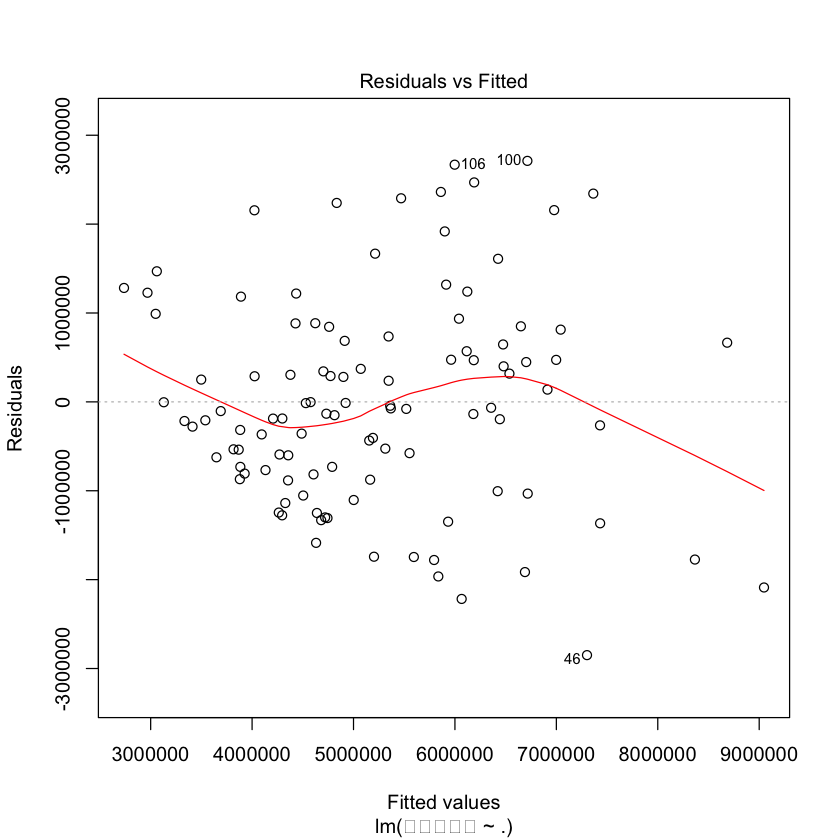

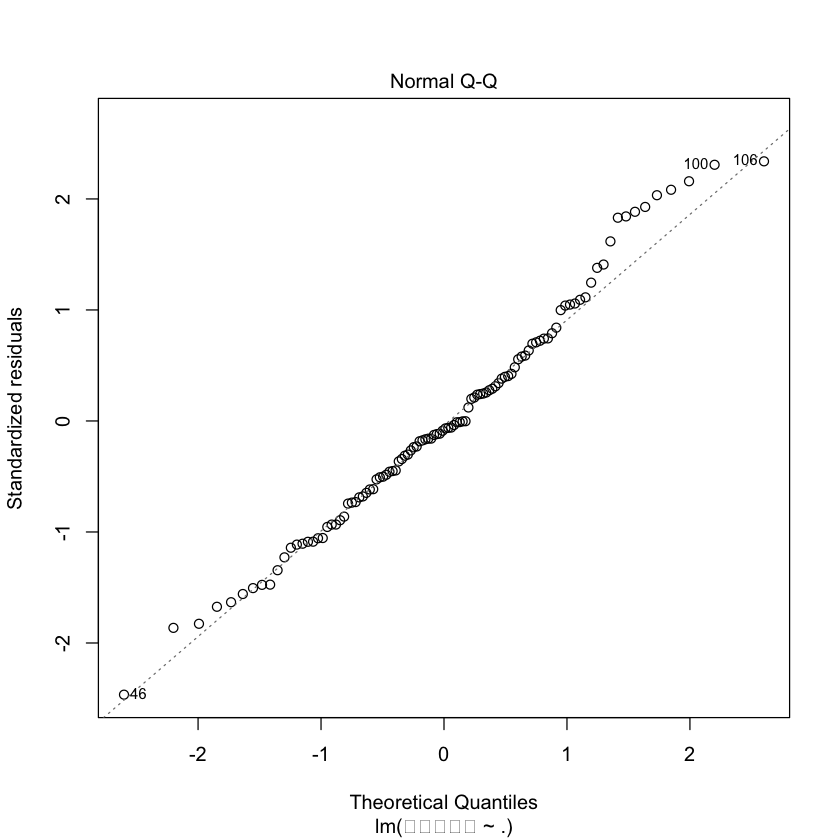

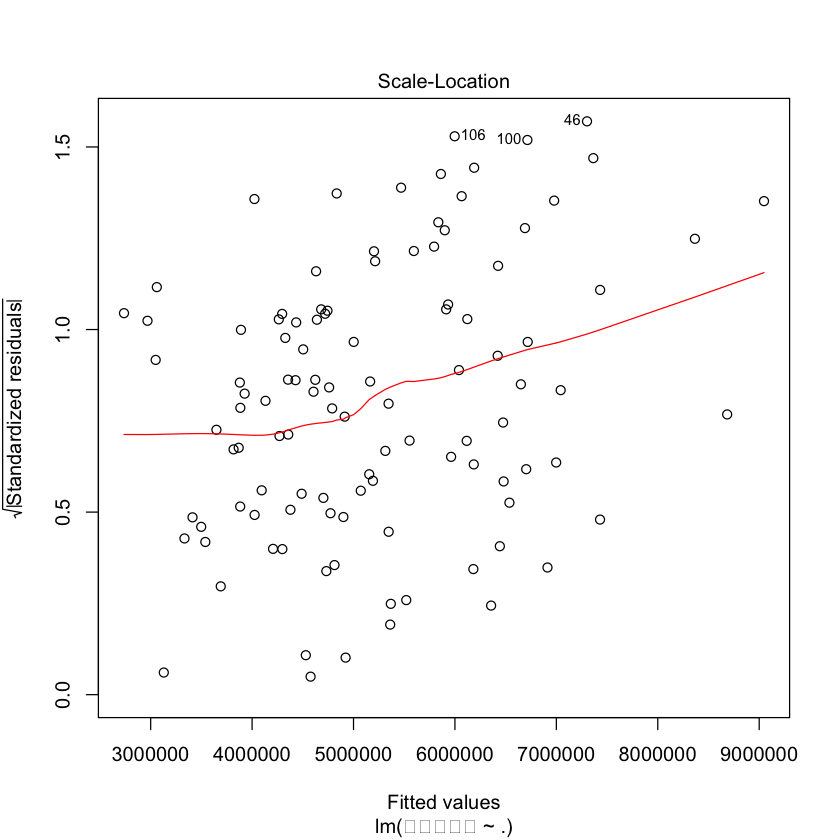

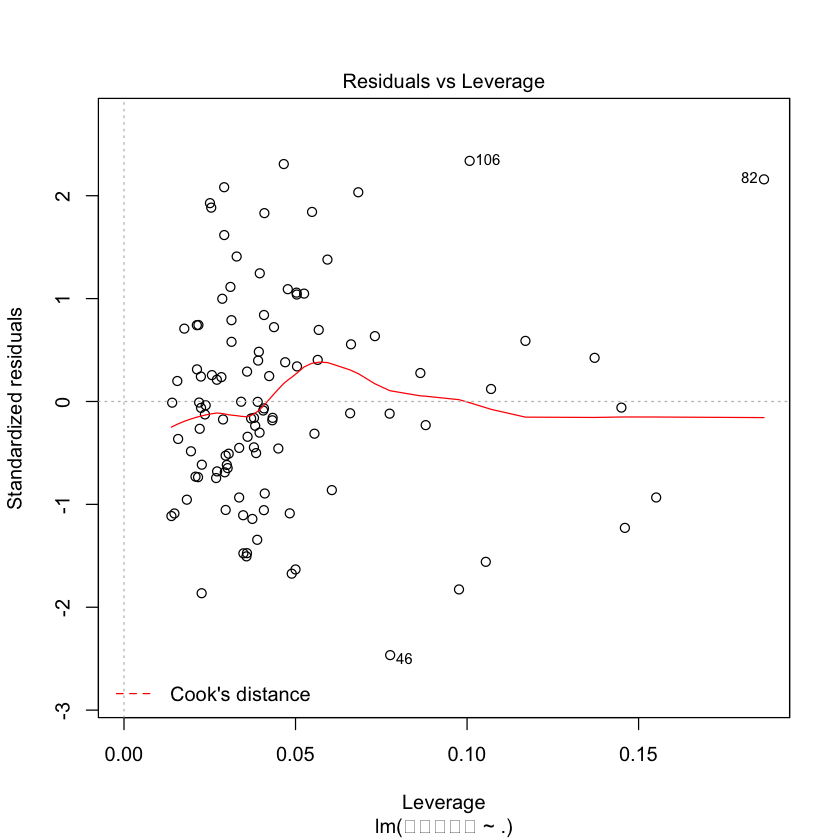

In [25]:
plot(a)

In [26]:
set_one <- subset(data[data$cluster == 1,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
set_two <- subset(data[data$cluster == 2,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
set_three <- subset(data[data$cluster == 3,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))

In [28]:
set_one

누적관객수,배우점수,스크린점유율,감독점수,장르_관객점수부여,감독_배우시너지


In [27]:
one <- lm(누적관객수~., set_one)
two <- lm(누적관객수~., set_two)
three <- lm(누적관객수~., set_three)
summary(one)
summary(two)
summary(three)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases


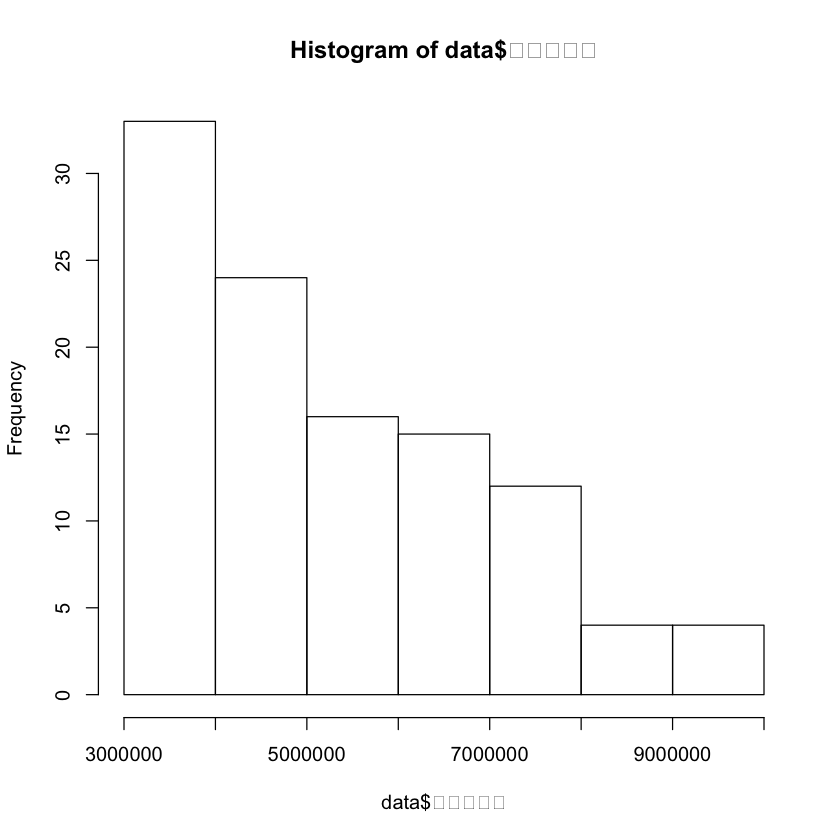

In [29]:
hist(data$누적관객수)

In [30]:
test <- subset(data[data$누적관객수 > 8000000 & data$누적관객수 < 10000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))

In [32]:
test <- subset(data[data$누적관객수 > 3000000 & data$누적관객수 < 4000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
nrow(test)
tt <- lm(누적관객수~., test)
summary(tt)
print("--------------------------------------------")
test <- subset(data[data$누적관객수 > 4000000 & data$누적관객수 < 5000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
nrow(test)
tt <- lm(누적관객수~., test)
summary(tt)
print("--------------------------------------------")
test <- subset(data[data$누적관객수 > 5000000 & data$누적관객수 < 7000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
nrow(test)
tt <- lm(누적관객수~., test)
summary(tt)
print("--------------------------------------------")
test <- subset(data[data$누적관객수 > 7000000 & data$누적관객수 < 10000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
nrow(test)
tt <- lm(누적관객수~., test)
summary(tt)
# print("--------------------------------------------")
# test <- subset(data[data$누적관객수 > 8000000 & data$누적관객수 < 10000000,],select = c(누적관객수, 배우점수, 스크린점유율, 감독점수, 장르_관객점수부여, 감독_배우시너지))
# nrow(test)
# tt <- lm(누적관객수~., test)
# summary(tt)

[1] 33


Call:
lm(formula = 누적관객수 ~ ., data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-314406  -47149   -6512   96801  265351 

Coefficients:
                   Estimate Std. Error t value           Pr(>|t|)    
(Intercept)       2698342.9   169902.4  15.882 0.0000000000000032 ***
배우점수            28524.9     7702.1   3.704           0.000964 ***
스크린점유율          915.8     3719.6   0.246           0.807382    
감독점수           -16642.4    24929.8  -0.668           0.510072    
장르_관객점수부여   18755.2     7685.9   2.440           0.021523 *  
감독_배우시너지     66848.5     9826.0   6.803 0.0000002627096172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143700 on 27 degrees of freedom
Multiple R-squared:  0.7917,	Adjusted R-squared:  0.7531 
F-statistic: 20.52 on 5 and 27 DF,  p-value: 0.00000001958


[1] "--------------------------------------------"


[1] 24


Call:
lm(formula = 누적관객수 ~ ., data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-363403 -179226  -22518  108105  486929 

Coefficients:
                  Estimate Std. Error t value         Pr(>|t|)    
(Intercept)        3862580     236457  16.335 0.00000000000307 ***
배우점수             53276      16850   3.162           0.0054 ** 
스크린점유율          8112       6465   1.255           0.2256    
감독점수            -20963      33186  -0.632           0.5355    
장르_관객점수부여    11868      16377   0.725           0.4780    
감독_배우시너지     -52738      30685  -1.719           0.1028    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 254800 on 18 degrees of freedom
Multiple R-squared:  0.4845,	Adjusted R-squared:  0.3413 
F-statistic: 3.383 on 5 and 18 DF,  p-value: 0.02497


[1] "--------------------------------------------"


[1] 31


Call:
lm(formula = 누적관객수 ~ ., data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-710674 -317166 -137225  230766 1214841 

Coefficients:
                  Estimate Std. Error t value      Pr(>|t|)    
(Intercept)        4167463     491532   8.479 0.00000000802 ***
배우점수             66674      26281   2.537        0.0178 *  
스크린점유율          9219       8974   1.027        0.3141    
감독점수             49385      38544   1.281        0.2119    
장르_관객점수부여    35525      15524   2.288        0.0308 *  
감독_배우시너지     -31123      33605  -0.926        0.3632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 508100 on 25 degrees of freedom
Multiple R-squared:  0.4763,	Adjusted R-squared:  0.3716 
F-statistic: 4.548 on 5 and 25 DF,  p-value: 0.004371


[1] "--------------------------------------------"


[1] 20


Call:
lm(formula = 누적관객수 ~ ., data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-760659 -348100  -79661  183770 1093688 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5483710    1130578   4.850 0.000257 ***
배우점수            -43857      42220  -1.039 0.316521    
스크린점유율         29381      13095   2.244 0.041542 *  
감독점수            260356      77728   3.350 0.004768 ** 
장르_관객점수부여    -3144      18298  -0.172 0.866027    
감독_배우시너지      69034      50238   1.374 0.191000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 590300 on 14 degrees of freedom
Multiple R-squared:  0.6654,	Adjusted R-squared:  0.5458 
F-statistic: 5.567 on 5 and 14 DF,  p-value: 0.004982
